In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd

In [2]:
with open('Q_AB.pickle', 'rb') as fp:
    Q = pickle.load(fp)

with open('inven_AB.pickle', 'rb') as fp:
    inven = pickle.load(fp)

In [3]:
sns.set_theme(style="whitegrid")

In [4]:
inven.shape

(10, 401, 2)

In [5]:
# part of Q and inven
pQ = Q[:, ::10, :, :]
pI = inven[:, ::10, :]

In [6]:
n_ins, n_period, n_agents, n_act = pQ.shape

In [7]:
df = []
for ins in range(n_ins):
    for act in [0, 1, 4, 5, 10, 15]:
        val = pQ[ins, :, :, act].mean(1)
        df.append(pd.DataFrame({'Q':val, 'instance': ins*np.ones(n_period), 
                                'Actions':[str(act+1),]*n_period, 'step': np.arange(n_period)}))
Qdf = pd.concat(df)

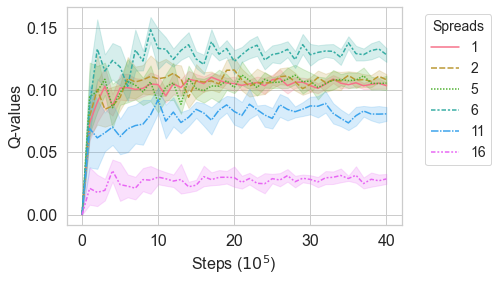

In [8]:
# figsize=(8,6)
plt.figure()
palette = sns.color_palette("husl", 6)
g = sns.lineplot(data=Qdf, x='step', y='Q', hue='Actions', palette=palette, ci=95, style='Actions')
plt.xlabel(r'Steps ($10^5$)', fontsize=16)
plt.ylabel('Q-values', fontsize=16)
g.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.legend(bbox_to_anchor=(1.05, 1), title='Spreads', fontsize=14, title_fontsize=14)
plt.savefig('Q_twosides.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)

In [9]:
pI.shape

(10, 41, 2)

In [10]:
n_period

41

In [11]:
val.shape

(41,)

In [12]:
df_temp = []
for ins in range(n_ins):
    for agent in range(n_agents):
        val = pI[ins, :, agent]
        df_temp.append(pd.DataFrame({'Inventory':val, 'instance': ins*np.ones(n_period), 
                                     'Agent':[str(agent+1),]*n_period, 'step': np.arange(n_period)}))
Idf = pd.concat(df_temp)

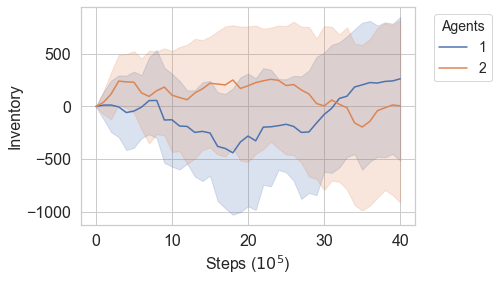

In [13]:
# figsize=(8,6)
plt.figure()
palette = sns.color_palette("husl", n_act)
g = sns.lineplot(data=Idf, x='step', y='Inventory', hue='Agent')

plt.xlabel(r'Steps ($10^5$)', fontsize=16)
plt.ylabel('Inventory', fontsize=16)
g.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.legend(bbox_to_anchor=(1.25, 1), title='Agents', fontsize=14, title_fontsize=14)
plt.savefig('Inv_twosides.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)